In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.signal import stft
import os
import pandas as pd
import sys
import glob
from scipy.stats import norm
from ipynb.fs.full.signalprocess_delta import SignalProcessor, GaussianQuantizer,DatasetDic1, downsamplePlotter,gaussian_histogram,DatasetDic2
from ipynb.fs.full.read_data import ExcelDataReader

In [145]:
#reader = ExcelDataReader(r'F:\junwei\dataset\MV001-100')
#data1, file1= reader.read_and_process_data(num_rows=1000)
#print(data1.shape)
#reader2 = ExcelDataReader(r'F:\junwei\dataset\MV101-200')
#data2, file2= reader2.read_and_process_data(num_rows=1000)
#print(data2.shape)
#reader3 = ExcelDataReader(r'F:\junwei\dataset\MV201-300')
#data3, file3= reader3.read_and_process_data(num_rows=1000)
#print(data3.shape)
#reader4 = ExcelDataReader(r'F:\junwei\dataset\MV301-400')
#data4, file4= reader4.read_and_process_data(num_rows=1000)
#print(data4.shape)
#reader5 = ExcelDataReader(r'F:\junwei\dataset\MV401-511')
#data5, file5= reader5.read_and_process_data(num_rows=1000)
#print(data5.shape)


(87, 1000, 3)
(84, 1000, 3)
(86, 1000, 3)
(86, 1000, 3)
(103, 1000, 3)


In [160]:
#data = np.concatenate((data1, data2, data3, data4, data5), axis=0)
#data.shape

(446, 1000, 3)

In [161]:
#data = np.load(r'F:\junwei\dataset\wavelet_EMD\denoised_3signals.npy')

In [162]:
#data.shape

(446, 1000, 3)

In [163]:
#master = pd.read_excel('F:\junwei\dataset\_MASTER_MAFAI2023_456cases.xlsx',usecols=['ID','Crs', 'R'])
# List of IDs to remove
#ids_to_remove = [ 19, 60, 33, 74, 24, 48, 30, 174, 108, 138, 109, 179, 144, 123, 206, 254, 381, 321, 386, 391, 394, 396, 397, 398, 400, 405, 406]

# Remove the rows with the specified IDs
#master1 = master[~master['ID'].isin(ids_to_remove)]
#master1 = master1.reset_index(drop=True)
#master1

In [164]:
# Find NaN rows in master1
#nan_rows = master1.isna().any(axis=1)
#nan_indices = nan_rows[nan_rows == True].index.tolist()

# Remove NaN rows from master1 and data
#master1 = master1.drop(nan_indices)
#data= np.delete(data, nan_indices, axis=0)

In [168]:
#data.shape
#np.save(r'F:\junwei\dataset\wavelet_EMD\clean_data.npy',data)

In [129]:
#master1 = master1.reset_index(drop=True)
#master1.shape

(442, 3)

In [8]:
#data[49]

In [16]:
#row_149 = master1.iloc[333]
#print("Row at index 149:", row_149)

In [131]:
# Create a boolean array indicating whether each element is non-finite
#non_finite_mask = ~np.isfinite(pressure)
# Find samples containing non-finite values
#samples_with_non_finite = np.any(non_finite_mask, axis=1)
# Get the indices of the samples containing non-finite values
#sample_indices = np.where(samples_with_non_finite)[0]
#print("Sample indices containing non-finite values:", sample_indices)

Sample indices containing non-finite values: []


In [132]:
# Create a boolean array indicating whether each element is non-finite
#non_finite_mask = ~np.isfinite(pressure)

#for i, row in enumerate(non_finite_mask):
 #   for j, is_non_finite in enumerate(row):
  #      if is_non_finite:
   #         prev_value = pressure[i, j-1] if j > 0 else np.nan
    #        next_value = pressure[i, j+1] if j < pressure.shape[1] - 1 else np.nan
#
            # Replace the non-finite value with the average of the neighboring values, if they are finite
 #           if np.isfinite(prev_value) and np.isfinite(next_value):
  #              pressure[i, j] = (prev_value + next_value) / 2

In [2]:
data1 = np.load(r'F:\junwei\dataset\wavelet_EMD\clean_data.npy')
#data2 = np.load(r'F:\junwei\dataset\signal_arg\arg_3signals.npy')

In [36]:
#combined_dataset = np.vstack((data1, data2))
# Check the shape of the combined dataset
#print(combined_dataset.shape)  # Should output (884, 1000, 3)

In [3]:
flow = data1[:,:,0]
pressure = data1[:,:,1]
volume = data1[:,:,2]

In [4]:
# Create a boolean array indicating whether each element is non-finite
non_finite_mask = ~np.isfinite(pressure)
# Find samples containing non-finite values
samples_with_non_finite = np.any(non_finite_mask, axis=1)
# Get the indices of the samples containing non-finite values
sample_indices = np.where(samples_with_non_finite)[0]
print("Sample indices containing non-finite values:", sample_indices)

Sample indices containing non-finite values: [148 330 387]


In [5]:
non_finite_mask = ~np.isfinite(pressure)

for i, row in enumerate(non_finite_mask):
    for j, is_non_finite in enumerate(row):
        if is_non_finite:
            prev_value = pressure[i, j-1] if j > 0 else np.nan
            next_value = pressure[i, j+1] if j < pressure.shape[1] - 1 else np.nan
#
            # Replace the non-finite value with the average of the neighboring values, if they are finite
            if np.isfinite(prev_value) and np.isfinite(next_value):
                pressure[i, j] = (prev_value + next_value) / 2

In [6]:
pressure.shape

(442, 1000)

In [6]:
import numpy as np

# Assuming pressure is your signal matrix of shape (442, 1000)
signal_matrix = pressure 

# Number of sample points
N = 1000

# Sample spacing (inverse of the sampling rate)
T = 1.0 / 50.0

# Indices of outlier samples
outlier_indices1 = [0, 2, 3, 9, 12, 28, 30, 33, 34, 36, 37, 42, 43, 45, 46, 47, 50, 59, 61, 63, 66]
outlier_indices2 = [1, 2, 3, 4, 7, 12, 13, 20, 22, 23, 25, 26, 28, 32, 33, 34, 37, 38, 43, 45, 50, 53, 54, 55, 58, 62, 63]

# Merge the two indices list and remove duplicate
outlier_indices = list(set(outlier_indices1 + outlier_indices2))

zero_freqs = []

for index in outlier_indices:

    signal = signal_matrix[index]

    y = signal

    yf = np.fft.fft(y)
    xf = np.fft.fftfreq(N, T)[:N//2]
    magnitude_spectrum = 2.0/N * np.abs(yf[0:N//2])

    # Defining threshold as 1% of the maximum magnitude
    threshold = 0.001 * max(magnitude_spectrum)

    # Finding the lowest frequency where magnitude drops below the threshold
    zero_freq = next((f for f, mag in zip(xf, magnitude_spectrum) if mag < threshold), None)

    if zero_freq is not None:
        zero_freqs.append(zero_freq)

# Taking average of frequencies
mean_zero_freq = np.mean(zero_freqs)

print(f'The mean frequency at which the magnitude spectrum drops below the threshold for outlier samples is {mean_zero_freq} Hz')


The mean frequency at which the magnitude spectrum drops below the threshold for outlier samples is 2.733783783783784 Hz


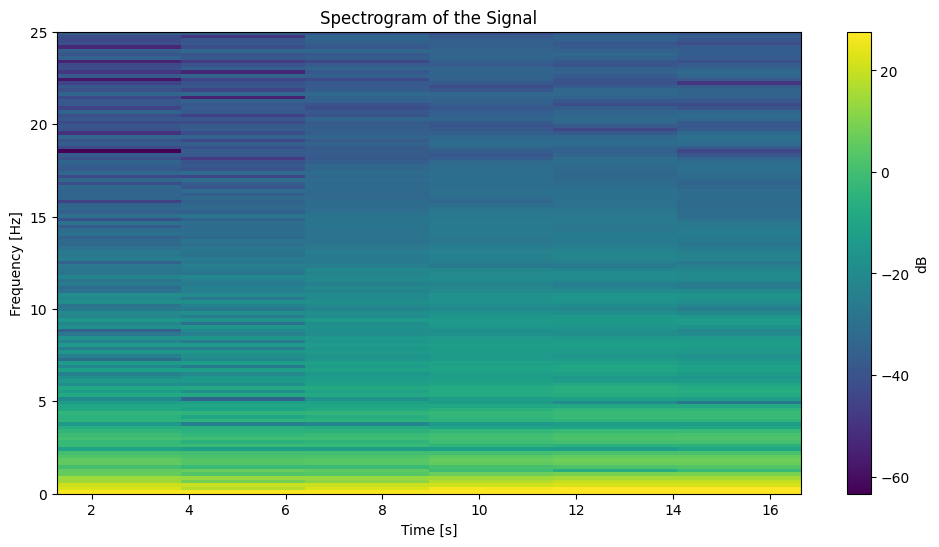

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming pressure is your signal matrix of shape (442, 1000)
signal_matrix = pressure

# Pick the first signal
signal = signal_matrix[100]

# Sample spacing (inverse of the sampling rate)
T = 1.0 / 50.0

plt.figure(figsize=(12, 6))

# Generate spectrogram
plt.specgram(signal, Fs=1./T, NFFT=256, noverlap=128)
plt.title('Spectrogram of the Signal')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar(label='dB')
plt.show()


In [10]:
import numpy as np

# Let's assume signals is your 2D numpy array of shape (442, 1000)
signals = volume  # example data

# Calculate the mean amplitude for each sample across all signals
mean_amplitudes = np.mean(np.abs(signals), axis=0)

# Now find the minimum and maximum mean amplitude
min_mean_amplitude = np.min(mean_amplitudes)
max_mean_amplitude = np.max(mean_amplitudes)

print(f"Min of mean amplitudes: {min_mean_amplitude}")
print(f"Max of mean amplitudes: {max_mean_amplitude}")


Min of mean amplitudes: 0.0
Max of mean amplitudes: 0.4040981108599319


In [ ]:
flat_signals = np.sort(mean_amplitudes.flatten())

top_max_values = flat_signals[442:]

print(f"Top 10 max values: {top_max_values}")

In [ ]:
indices = np.where(mean_amplitudes == 0)

# Print the indices
for idx in range(len(indices[0])):
    print(f"Index for max value: ({indices[0][idx]}, {indices[1][idx]})")

In [65]:
# Let's assume signals is your 2D numpy array of shape (442, 1000)
signals = volume  # example data
fs = 50  # Hz

# Initialize min and max variables
min_spectrum = np.inf
max_spectrum = -np.inf

# Go through each signal
for signal in signals:
    # Calculate power spectrum for each signal
    fourier_transform = np.fft.fft(signal)
    abs_fourier_transform = np.abs(fourier_transform)
    power_spectrum = np.square(abs_fourier_transform)


    #mean_power_spectrum = np.mean(power_spectrum, axis=0)

    # Now find the minimum and maximum mean amplitude
    min_spectrum = np.min(power_spectrum)
    max_spectrum = np.max(power_spectrum)

print(f"Min Spectrum: {min_spectrum}")
print(f"Max Spectrum: {max_spectrum}")


Min Spectrum: 0.0022713596613478334
Max Spectrum: 22542.021101400034


In [ ]:
flat_signals = np.sort(power_spectrum.flatten())[::-1]

top_max_values = flat_signals[442:]

print(f"Top 10 max values: {top_max_values}")


In [14]:
import numpy as np

# Let's assume data is your 2D numpy array of shape (442, 1000)
data = pressure  # example data

# Initialize autocorrelation array
autocorr_array = np.zeros(data.shape)

# Go through each signal
for i, signal in enumerate(data):
    # Nearest size with power of 2
    size = 2 ** np.ceil(np.log2(2 * len(signal) - 1)).astype('int')

    # Variance
    var = np.var(signal)

    # Normalized data
    ndata = signal - np.mean(signal)

    # Compute the FFT
    fft = np.fft.fft(ndata, size)

    # Get the power spectrum
    pwr = np.abs(fft) ** 2

    # Calculate the autocorrelation from inverse FFT of the power spectrum
    acorr = np.fft.ifft(pwr).real / var / len(signal)

    # Assign autocorrelation to the corresponding row in the autocorrelation array
    autocorr_array[i] = acorr[:len(signal)]

# Find the minimum and maximum autocorrelation values across all signals
min_autocorr = np.min(autocorr_array)
max_autocorr = np.max(autocorr_array)

print(f"Min Autocorrelation: {min_autocorr}")
print(f"Max Autocorrelation: {max_autocorr}")


Min Autocorrelation: -0.8575004789143889
Max Autocorrelation: 1.0000000000000007


In [16]:
autocorr_array

array([[ 1.00000000e+00,  9.94189663e-01,  9.80373840e-01, ...,
         1.52592158e-03,  1.05444571e-03,  5.24912259e-04],
       [ 1.00000000e+00,  9.93529188e-01,  9.77186632e-01, ...,
         5.15420995e-04,  4.02270360e-04,  2.13848114e-04],
       [ 1.00000000e+00,  9.90524711e-01,  9.66526977e-01, ...,
        -1.76403749e-04, -6.66748599e-05, -2.11611888e-05],
       ...,
       [ 1.00000000e+00,  9.93596364e-01,  9.77893980e-01, ...,
         1.19903474e-03,  8.53451732e-04,  4.22864646e-04],
       [ 1.00000000e+00,  9.95561868e-01,  9.84212726e-01, ...,
         1.53041325e-03,  1.08112996e-03,  5.48769135e-04],
       [ 1.00000000e+00,  9.92005337e-01,  9.72099813e-01, ...,
         1.89973649e-03,  1.27909412e-03,  6.27446582e-04]])

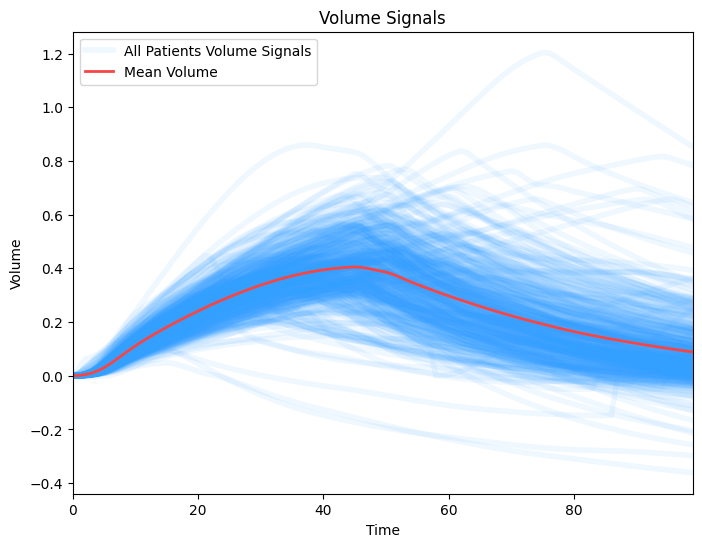

In [7]:
import matplotlib.pyplot as plt
import numpy as np

class PressurePlotter:
    def __init__(self, pressure):
        self.pressure = pressure

    def plot(self, index1, index2):
        plt.figure(figsize=(8,6))

        # Combine the indices
        combined_indices = index1 + index2

        # Calculate the mean for the combined indices
        mean_combined = np.mean(self.pressure[combined_indices, :100], axis=0)

        # Exclude outliers from the data for mean calculation
        remaining_indices = [i for i in range(self.pressure.shape[0]) if i not in combined_indices]
        mean_pressure = np.mean(self.pressure[remaining_indices, :100], axis=0)

        # Define the RGB color for the grey lines with a blue tint
        grey_with_blue = (0.7, 0.7, 0.8)

        # Plot all patients' data in grey with a blue tint
        for i in range(self.pressure.shape[0]):
            if i == self.pressure.shape[0] - 1:
                plt.plot(self.pressure[i, :100], color='#33A0FF', alpha=0.08, linewidth=4, label='All Patients Volume Signals')  # Plot the last line with label
            else:
                plt.plot(self.pressure[i, :100], color='#33A0FF', alpha=0.08, linewidth=4, label='_nolegend_')  # Plot other lines without label

        # Plot the mean pressure in green with markers
        plt.plot(mean_pressure, color='#F94444', alpha=1.0, linewidth=2.0, linestyle='-', label='Mean Volume')

        # Plot the mean pressure for the combined indices in pink with markers
        #plt.plot(mean_combined, color='#FF4326', alpha=0.8, linewidth=2.0, linestyle='-', marker='o', markersize=1, label='Mean Pressure (Outliers)')

        # Enhancements for prettier plot
        plt.title('Volume Signals')
        plt.xlabel('Time')
        plt.ylabel('Volume')
        plt.grid(False)  # Turn off the grid
        plt.legend()
        plt.xlim(0, 99)

        plt.show()




index1 = [0, 2, 3, 9, 12, 28, 30, 33, 34, 36, 37, 42, 43, 45, 46, 47, 50, 59, 61, 63, 66]
index2 = [1, 2, 3, 4, 7, 12, 13, 20, 22, 23, 25, 26, 28, 32, 33, 34, 37, 38, 43, 45, 50, 53, 54, 55, 58, 62, 63]

# assuming pressure is your (442,1000) numpy array
plotter = PressurePlotter(volume)
plotter.plot(index1, index2)


In [8]:
import numpy as np

# Let's assume signals is your 2D numpy array of shape (442, 1000)
signals = pressure  # example data

# Initialize min and max variables
min_phase = np.inf
max_phase = -np.inf

# Go through each signal
for signal in signals:
    # Apply complex-valued Fourier transform
    fourier_transform = np.fft.fft(signal)

    # Compute phase angles
    phase = np.angle(fourier_transform)

    # Update min and max
    min_phase = min(min_phase, np.min(phase))
    max_phase = max(max_phase, np.max(phase))

print(f"Min Phase: {min_phase}")
print(f"Max Phase: {max_phase}")


Min Phase: -3.141592653589793
Max Phase: 3.141592653589793


In [26]:
class downsamplePlotter:
    def __init__(self, pressure_signal,downsampling_rate):
        self.pressure_signal = pressure_signal
        self.downsampling_rate = downsampling_rate
        self.x_coord = np.arange(0, pressure_signal.size, self.downsampling_rate)

    def plot_pressure_signal(self):
        pressure_0 = self.pressure_signal
        fig, (ax1, ax3) = plt.subplots(nrows=2,figsize=(9, 5))

        ax1.set_title('Original Volume Signal')
        ax1.plot(pressure_0,label='Original Signal',color="black")
        ax1.set_ylabel('Volume (L)')
        ax1.set_xlabel('Time')

        #ax2.set_title('Sampled signal')
        #ax2.plot(pressure_0)
        #for x in np.nditer(self.x_coord):
         #   ax2.axvline(x, color='red', linewidth=0.5)
        #ax2.set_ylabel('Pressure')
        #ax2.set_xlabel('Time')
        ax3.set_title('Downsampled Signal')
        ax3.plot(range(0, pressure_0.size, self.downsampling_rate), pressure_0[::self.downsampling_rate], 'ro', markersize=3, color="black")
        ax3.plot(range(0, pressure_0.size, self.downsampling_rate), pressure_0[::self.downsampling_rate], 'b-', linewidth=0.5, color='green')
        ax3.set_ylabel('Volume (L)')
        ax3.set_xlabel('Time')

        fig.subplots_adjust(hspace=0.5)
        plt.show()

C:\Users\DSCI\AppData\Local\Temp\ipykernel_69296\2912919458.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax3.plot(range(0, pressure_0.size, self.downsampling_rate), pressure_0[::self.downsampling_rate], 'ro', markersize=3, color="black")
C:\Users\DSCI\AppData\Local\Temp\ipykernel_69296\2912919458.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax3.plot(range(0, pressure_0.size, self.downsampling_rate), pressure_0[::self.downsampling_rate], 'b-', linewidth=0.5, color='green')


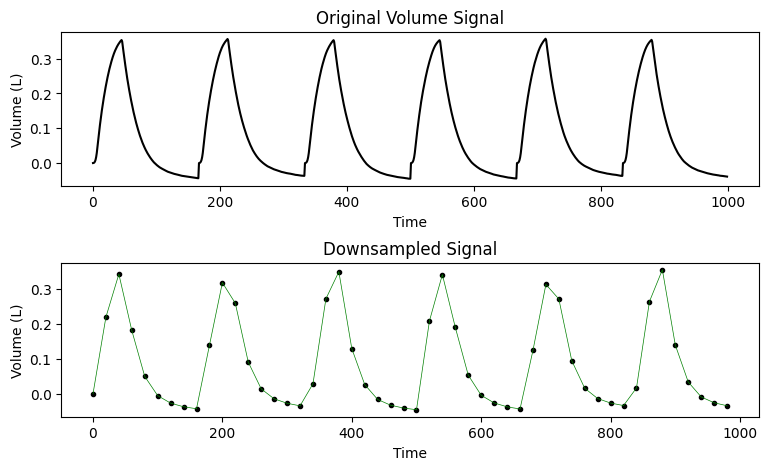

In [27]:
# Create an instance of the PressurePlotter class with a pressure signal
plotter = downsamplePlotter(volume[0],20)
# Call the plot_pressure_signal() method to display the pressure signal plot
plotter.plot_pressure_signal()

In [8]:
delta_v = SignalProcessor(volume,20).delta_seqs
delta_f = SignalProcessor(flow, 20).delta_seqs
delta_p = SignalProcessor(pressure, 20).delta_seqs

In [9]:
def plot_pressure_signal(delta_P, delta_F, delta_V):
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 4))

    ax1.set_title('Pressure Signal')
    ax1.plot(delta_P, 'ro', markersize=3, color="black")
    ax1.plot(delta_P, 'b-', linewidth=0.5, color='red')
    ax1.set_ylabel('Pressure (cmH2O)')
    ax1.set_xlabel('Time')

    ax2.set_title('Flow Signal')
    ax2.plot(delta_F, 'ro', markersize=3, color="black")
    ax2.plot(delta_F, 'b-', linewidth=0.5, color='blue')
    ax2.set_ylabel('Flow (F/s)')
    ax2.set_xlabel('Time')

    ax3.set_title('Volume Signal')
    ax3.plot(delta_V, 'ro', markersize=3, color="black")
    ax3.plot(delta_V, 'b-', linewidth=0.5, color='green')
    ax3.set_ylabel('Volume (L)')
    ax3.set_xlabel('Time')

    fig.subplots_adjust(wspace=0.4)
    plt.show()

In [10]:
import numpy
delta_V = numpy.array(delta_v) 
delta_P = numpy.array(delta_p)
delta_F = numpy.array(delta_f)  

In [11]:
delta_P[0].shape

(49,)

C:\Users\DSCI\AppData\Local\Temp\ipykernel_69296\263132559.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax1.plot(delta_P, 'ro', markersize=3, color="black")
C:\Users\DSCI\AppData\Local\Temp\ipykernel_69296\263132559.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax1.plot(delta_P, 'b-', linewidth=0.5, color='red')
C:\Users\DSCI\AppData\Local\Temp\ipykernel_69296\263132559.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(delta_F, 'ro', markersize=3, color="black")
C:\Users\DSCI\AppData\Local\Temp\ipykernel_69296\263132559.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> c

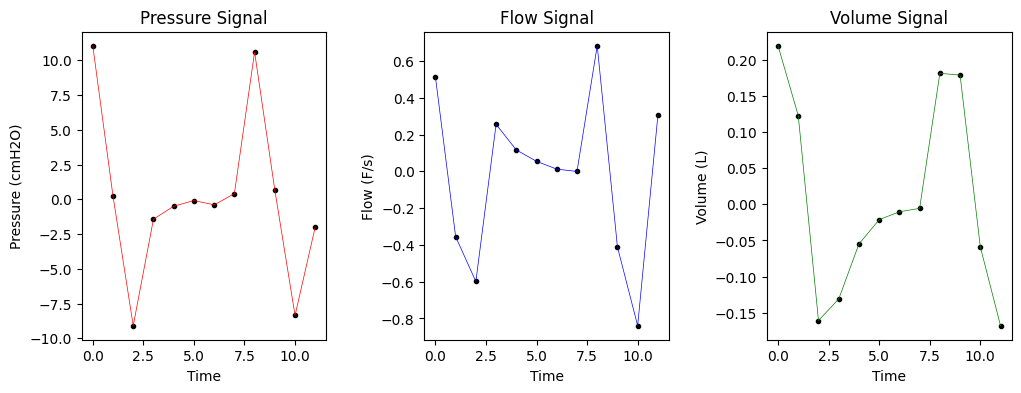

In [12]:
plot_pressure_signal(delta_P[0][:12],delta_F[0][:12], delta_V[0][:12])

In [14]:
all_delta_v = np.concatenate(delta_v)
all_delta_p = np.concatenate(delta_p)
all_delta_f = np.concatenate(delta_f)

In [17]:
class gaussian_histogram:
    def __init__(self, data, num_bins, num_std):
        self.data = data
        self.num_bins = num_bins
        self.num_std = num_std

    def plot_gaussian_histogram(self):
        plt.hist(self.data, bins=self.num_bins, edgecolor='black', density=True)
        plt.xlabel('Data')
        plt.ylabel('Density')
        plt.title('Histogram - Probability Density')
        plt.show()


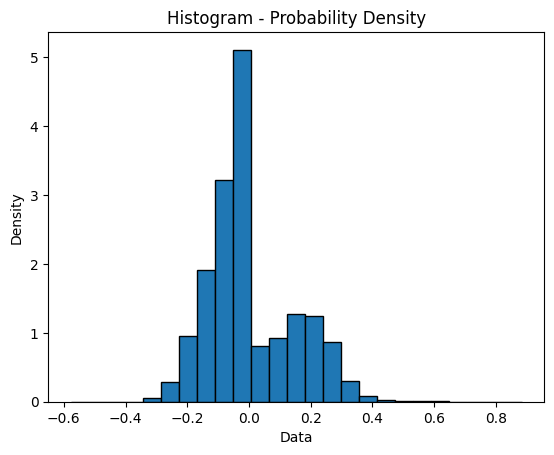

In [18]:
data_processor_v = gaussian_histogram(all_delta_v,25,4)
data_processor_v.plot_gaussian_histogram()
quantizer = GaussianQuantizer(all_delta_v, 25, ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L','M', 'N', 'O', 'P','Q', 'R','S','T','U', 'V','W','X', 'Y'])
converted_v = quantizer.convert_dataset(delta_v)

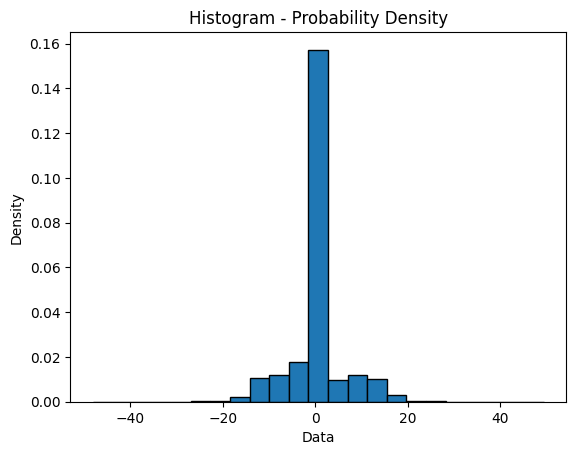

In [19]:
data_processor_p = gaussian_histogram(all_delta_p,23,4)
data_processor_p.plot_gaussian_histogram()
# Initialize the GaussianQuantizer
quantizer = GaussianQuantizer(all_delta_p, 23, [ 'Z','1','2','3','4','5','6','7','8','9','黑','龙','江','新','疆','西','藏','北','京','天','津','合','肥'])
# Convert the dataset
converted_p = quantizer.convert_dataset(delta_p)

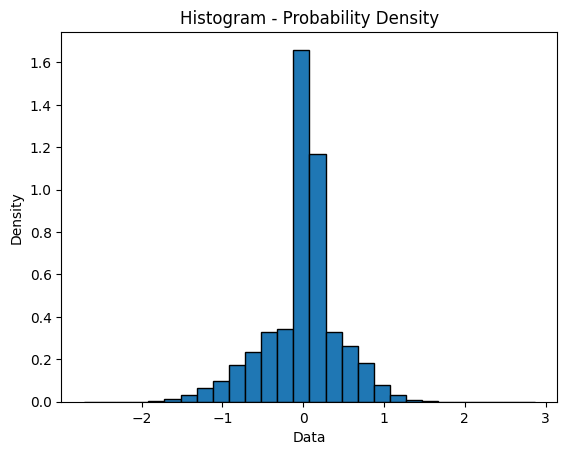

In [20]:
data_processor_f = gaussian_histogram(all_delta_f,28,4)
data_processor_f.plot_gaussian_histogram()
# Initialize the GaussianQuantizer 
quantizer = GaussianQuantizer(all_delta_f, 28, ['我','要','快','点','结','束','可','不','以','觉','得','真','的','儿','杨','竣','苇','爱','云','南','贵','东','北','官','渡','区','盘','龙'])
# Convert the dataset
converted_f = quantizer.convert_dataset(delta_f)

In [101]:
v = np.array(converted_v)
p = np.array(converted_p)
f = np.array(converted_f)

In [102]:
mapper = DatasetDic1(f, v, p)
final_dataset = mapper.create_words_dataset()
dictionary,mapped_dataset = mapper.create_word_to_index()

In [103]:
final_dataset = np.array(final_dataset)
dictionary = np.array(dictionary)
mapped_dataset = np.array(mapped_dataset)

In [104]:
final_dataset[0]

array(['爱的的', '的觉杨', '杨杨杨', '杨儿儿', '儿儿儿', '儿杨苇', '的的儿', '得杨杨', '杨杨儿',
       '儿儿儿', '儿儿儿', '爱儿的', '的觉杨', '杨杨杨', '儿儿儿', '儿儿儿', '儿儿爱', '的的的',
       '觉杨杨', '杨杨杨', '儿儿儿', '儿儿儿', '杨苇的', '的的觉', '杨杨杨', '杨杨儿', '儿儿儿',
       '儿儿苇', '杨的的', '儿得杨', '杨杨杨', '儿儿儿', '儿儿儿', 'LLL', 'KIH', 'III',
       'JJJ', 'JJJ', 'JKM', 'LKK', 'HHI', 'IJJ', 'JJJ', 'JJJ', 'KML',
       'KKH', 'HII', 'JJJ', 'JJJ', 'JJL', 'MLK', 'IHI', 'IIJ', 'JJJ',
       'JJJ', 'KLL', 'KKI', 'HII', 'JJJ', 'JJJ', 'JJK', 'MLK', 'KHH',
       'IIJ', 'JJJ', 'JJJ', '北疆疆', '新龙新', '新新新', '新疆疆', '新新疆', '疆疆藏',
       '疆疆疆', '龙新新', '新新新', '疆疆疆', '疆疆疆', '西西疆', '疆新龙', '新新新', '新疆疆',
       '新疆疆', '疆疆藏', '疆疆疆', '龙新新', '新新新', '疆新疆', '新疆疆', '疆北疆', '疆新龙',
       '新新新', '新新疆', '新疆新', '疆疆西', '藏疆疆', '新龙新', '新新新', '疆新疆', '疆疆疆'],
      dtype='<U3')

In [105]:
dictionary

array({'6黑新': 0, '7新新': 1, '8新新': 2, '8江新': 3, '8疆新': 4, '9新新': 5, '9新疆': 6, '9江新': 7, '9疆京': 8, '9疆新': 9, '9龙新': 10, 'ALH': 11, 'CLK': 12, 'EMK': 13, 'EML': 14, 'FHI': 15, 'FIJ': 16, 'FLL': 17, 'FML': 18, 'FMM': 19, 'GGG': 20, 'GGH': 21, 'GGI': 22, 'GHH': 23, 'GHI': 24, 'GHJ': 25, 'GII': 26, 'GIJ': 27, 'GLI': 28, 'GLJ': 29, 'GLL': 30, 'GLM': 31, 'GML': 32, 'GOP': 33, 'HGH': 34, 'HGI': 35, 'HHH': 36, 'HHI': 37, 'HHJ': 38, 'HHK': 39, 'HHN': 40, 'HHP': 41, 'HIH': 42, 'HII': 43, 'HIJ': 44, 'HIL': 45, 'HIM': 46, 'HIO': 47, 'HJI': 48, 'HJJ': 49, 'HJL': 50, 'HKL': 51, 'HLG': 52, 'HLL': 53, 'HML': 54, 'HNL': 55, 'HNM': 56, 'HOL': 57, 'IDL': 58, 'IDM': 59, 'IEL': 60, 'IFH': 61, 'IGG': 62, 'IGH': 63, 'IGI': 64, 'IGL': 65, 'IGN': 66, 'IHH': 67, 'IHI': 68, 'IHL': 69, 'IHM': 70, 'IHN': 71, 'IIE': 72, 'IIG': 73, 'IIH': 74, 'III': 75, 'IIJ': 76, 'IIK': 77, 'IIL': 78, 'IIM': 79, 'IIN': 80, 'IIT': 81, 'IIU': 82, 'IJD': 83, 'IJE': 84, 'IJG': 85, 'IJH': 86, 'IJI': 87, 'IJJ': 88, 'IJK': 89, 'IJL': 90, 'I

In [106]:
mapped_dataset.shape

(442, 99)

In [107]:
np.save(r'F:\junwei\dataset\10HZ\final_dataset.npy', final_dataset)
np.save(r'F:\junwei\dataset\10HZ\dictionary.npy', dictionary)
np.save(r'F:\junwei\dataset\10HZ\mapped_dataset.npy', mapped_dataset)
#master1.to_excel(r'F:\junwei\dataset\_MASTER_modified.xlsx', index=False)

In [34]:
def get_last_index(dictionary):
    return max(dictionary.values())

v_word_creator = DatasetDic2(v)
v_result = v_word_creator.create_words_dataset()
dic_v, map_v = v_word_creator.create_word_to_index()

p_word_creator = DatasetDic2(p)
p_result = p_word_creator.create_words_dataset()
start_index_p = get_last_index(dic_v) + 1
dic_p, map_p = p_word_creator.create_word_to_index(start_index_p)

f_word_creator = DatasetDic2(f)
f_result = f_word_creator.create_words_dataset()
start_index_f = get_last_index(dic_p) + 1
dic_f, map_f = f_word_creator.create_word_to_index(start_index_f)


In [35]:
combined_data_3d = np.stack((map_p, map_f, map_v), axis=2)
combined_data_3d.shape

(442, 17, 3)

In [36]:
np.save(r'F:\junwei\dataset\20HZ\combined_data_3d.npy', combined_data_3d)